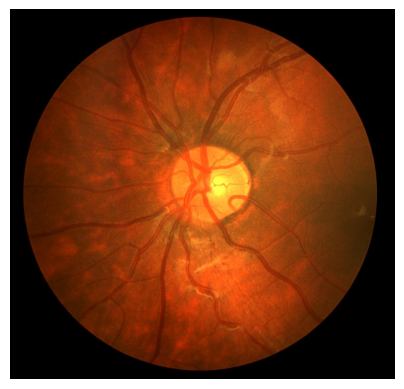

In [153]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
img_path = r"CHASE_DB1/Images/Image_01L.jpg"

# Leer y convertir la imagen
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


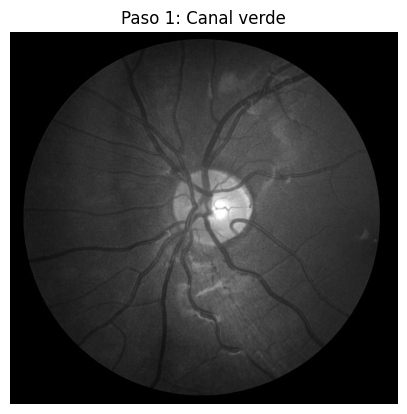

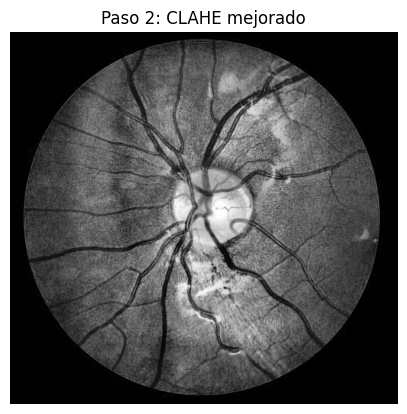

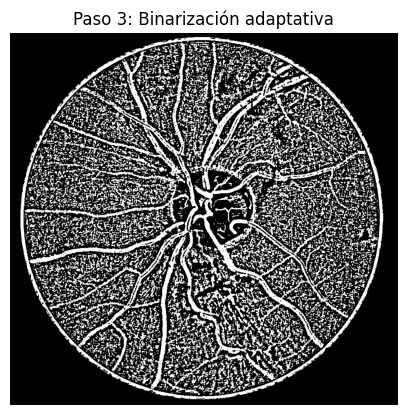

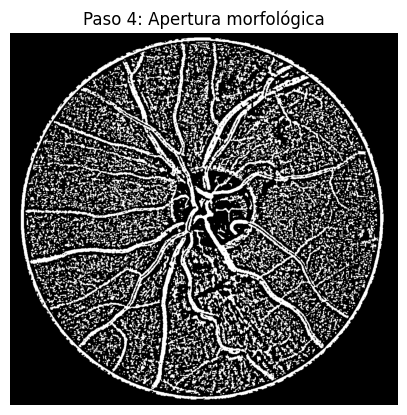

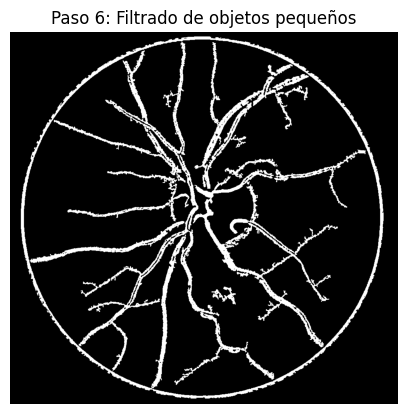

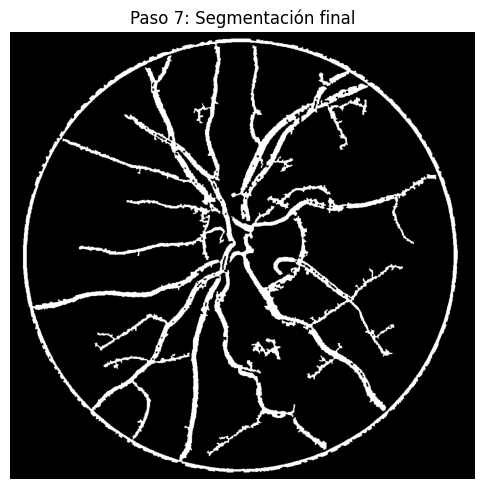

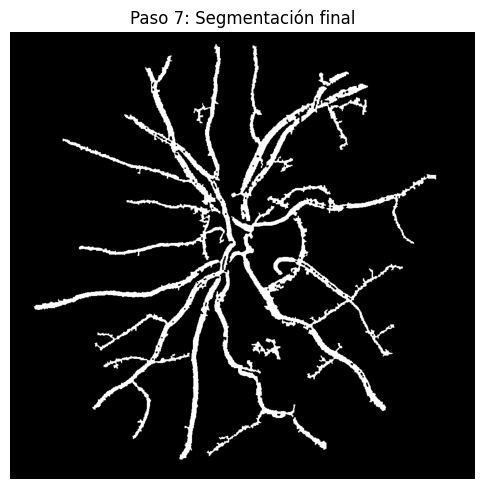

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label
from skimage.morphology import remove_small_objects

# --- Paso 1: Leer imagen y canal verde ---
img = cv2.imread("CHASE_DB1/Images/Image_01L.jpg")
green = img[:, :, 1]
plt.figure(figsize=(5, 5))
plt.imshow(green, cmap='gray')
plt.title("Paso 1: Canal verde")
plt.axis('off')
plt.show()

# --- Paso 2: CLAHE con mayor realce ---
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
enhanced = clahe.apply(green)
plt.figure(figsize=(5, 5))
plt.imshow(enhanced, cmap='gray')
plt.title("Paso 2: CLAHE mejorado")
plt.axis('off')
plt.show()

# --- Paso 3: Binarización adaptativa con blockSize mayor ---
adaptive = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY_INV, blockSize=19, C=5)
plt.figure(figsize=(5, 5))
plt.imshow(adaptive, cmap='gray')
plt.title("Paso 3: Binarización adaptativa")
plt.axis('off')
plt.show()

# --- Paso 4: Apertura para eliminar ruido fino ---
opened = cv2.morphologyEx(adaptive, cv2.MORPH_OPEN, np.ones((2, 2), np.uint8), iterations=1)
plt.figure(figsize=(5, 5))
plt.imshow(opened, cmap='gray')
plt.title("Paso 4: Apertura morfológica")
plt.axis('off')
plt.show()

# --- Paso 5: Eliminar regiones pequeñas ---
mask_bool = opened.astype(bool)
filtered = remove_small_objects(mask_bool, min_size=500)
filtered_mask = (filtered * 255).astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(filtered_mask, cmap='gray')
plt.title("Paso 6: Filtrado de objetos pequeños")
plt.axis('off')
plt.show()

# --- Paso 6: Cierre más fuerte para unir vasos fragmentados ---
final_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=1)
plt.figure(figsize=(6, 6))
plt.imshow(final_mask, cmap='gray')
plt.title("Paso 7: Segmentación final")
plt.axis("off")
plt.show()

# Get image dimensions
# Find contours
contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Assume the largest contour is the circle
largest_contour = max(contours, key=cv2.contourArea)
# Fit a minimum enclosing circle to it
(cx, cy), radius = cv2.minEnclosingCircle(largest_contour)
h, w = final_mask.shape
# Create a mask: 1 inside the circle, 0 outside
Y, X = np.ogrid[:h, :w]
dist_from_center = np.sqrt((X - cx)**2 + (Y - cy)**2)
mask = dist_from_center < (radius-12)   # -5 to exclude the border, adjust as needed


# Apply mask
final_mask_final = final_mask.copy()
final_mask_final[~mask] = 0

plt.figure(figsize=(6, 6))
plt.imshow(final_mask_final, cmap='gray')
plt.title("Paso 7: Segmentación final")
plt.axis("off")
plt.show()

In [155]:
# --- Paso 7: Cargar máscara de referencia y calcular Dice ---
# Asegúrate de que la máscara de referencia tenga el mismo tamaño que final_mask

# 1. Lee la máscara de referencia
# ground_truth = cv2.imread("CHASE_DB1/Masks/Image_01L_1stHO.png", cv2.IMREAD_GRAYSCALE)
ground_truth = cv2.imread("CHASE_DB1/Masks/Image_01L_2ndHO.png", cv2.IMREAD_GRAYSCALE)
# 2. Binariza ambas máscaras (en caso tengan valores diferentes a 0 y 255)
_, final_bin = cv2.threshold(final_mask_final, 127, 1, cv2.THRESH_BINARY)
_, gt_bin = cv2.threshold(ground_truth, 127, 1, cv2.THRESH_BINARY)

# 3. Calcula el coeficiente de Dice
def dice_coefficient(mask1, mask2):
    mask1 = mask1.astype(bool)
    mask2 = mask2.astype(bool)
    intersection = np.logical_and(mask1, mask2)
    dice = 2. * intersection.sum() / (mask1.sum() + mask2.sum())
    return dice

dice_score = dice_coefficient(final_bin, gt_bin)
print(f"Coeficiente de Dice: {dice_score:.4f}")

Coeficiente de Dice: 0.6653


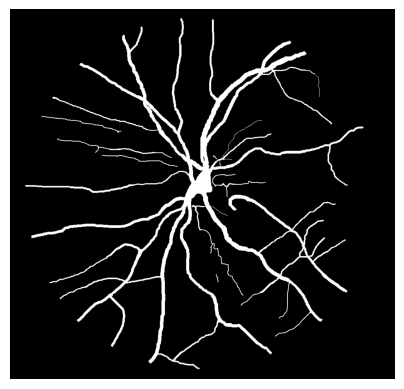

In [156]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
img_path = r"CHASE_DB1/Masks/Image_01L_2ndHO.png"

# Leer y convertir la imagen
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
# --- Paso 1: Leer imagen y canal verde ---
# img = cv2.imread("CHASE_DB1/Images/Image_01L.jpg")

def read_img(img):
    green = img[:, :, 1]

    return green

def realce_img(green):
    # --- Paso 2: CLAHE con mayor realce ---
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(green)

    return enhanced

def binarizacion_img(enhanced):

    # --- Paso 3: Binarización adaptativa con blockSize mayor ---
    adaptive = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY_INV, blockSize=19, C=5)

    return adaptive

def eliminar_ruido_fino(adaptive):

    # --- Paso 4: Apertura para eliminar ruido fino ---
    opened = cv2.morphologyEx(adaptive, cv2.MORPH_OPEN, np.ones((2, 2), np.uint8), iterations=1)

    return opened

def eliminar_regiones_pequenia(opened):
    # --- Paso 5: Eliminar regiones pequeñas ---
    mask_bool = opened.astype(bool)
    filtered = remove_small_objects(mask_bool, min_size=500)
    filtered_mask = (filtered * 255).astype(np.uint8)

    return filtered_mask

def cierre_fuerte(filtered_mask):
    # --- Paso 6: Cierre más fuerte para unir vasos fragmentados ---
    final_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=1)

    return final_mask

def eliminar_contorno(final_mask):
    # Get image dimensions
    # Find contours
    _, thresh = cv2.threshold(final_mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Assume the largest contour is the circle
    largest_contour = max(contours, key=cv2.contourArea)
    # Fit a minimum enclosing circle to it
    (cx, cy), radius = cv2.minEnclosingCircle(largest_contour)
    h, w = final_mask.shape
    # cx, cy = w // 2, h // 2  # center
    radius = min(cx, cy)  # slightly smaller than the image (adjust if needed)

    # Create a mask: 1 inside the circle, 0 outside
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - cx)**2 + (Y - cy)**2)
    mask = dist_from_center < (radius - 25)   # -5 to exclude the border, adjust as needed

    # Apply mask
    final_mask_final = final_mask.copy()
    final_mask_final[~mask] = 0


    return final_mask_final

def dice_coefficient(mask1, mask2):
    mask1 = mask1.astype(bool)
    mask2 = mask2.astype(bool)
    intersection = np.logical_and(mask1, mask2)
    dice = 2. * intersection.sum() / (mask1.sum() + mask2.sum())
    return dice

In [ ]:
img = cv2.imread("CHASE_DB1/Images/Image_01L.jpg")
masked_img = cv2.imread("CHASE_DB1/Masks/Image_01L_2ndHO.png", cv2.IMREAD_GRAYSCALE)

green = read_img(img)
enhanced = realce_img(green)
adaptive = binarizacion_img(enhanced)
opened = eliminar_ruido_fino(adaptive)
filtered_mask = eliminar_regiones_pequenia(opened)
final_mask = cierre_fuerte(filtered_mask)
final_mask_final =eliminar_contorno(final_mask)

# 2. Binariza ambas máscaras (en caso tengan valores diferentes a 0 y 255)
_, final_bin = cv2.threshold(final_mask_final, 127, 1, cv2.THRESH_BINARY)
_, gt_bin = cv2.threshold(masked_img, 127, 1, cv2.THRESH_BINARY)

# 3. Calcula el coeficiente de Dice
dice_score = dice_coefficient(final_bin, gt_bin)
print(f"Coeficiente de Dice: {dice_score:.4f}")

Coeficiente de Dice: 0.6649


In [159]:
from pathlib import Path
import os
image_path = r'CHASE_DB1/Images'
folder_path = Path(r'CHASE_DB1/Masks')
all_paths = sorted([[os.path.join(str(folder_path),str(f.relative_to(folder_path))),os.path.join(image_path,str(f.relative_to(folder_path))[:9]+'.jpg')] for f in folder_path.iterdir() if f.is_file()])
print(all_paths)
print(len(all_paths))

[['CHASE_DB1/Masks/Image_01L_1stHO.png', 'CHASE_DB1/Images/Image_01L.jpg'], ['CHASE_DB1/Masks/Image_01L_2ndHO.png', 'CHASE_DB1/Images/Image_01L.jpg'], ['CHASE_DB1/Masks/Image_01R_1stHO.png', 'CHASE_DB1/Images/Image_01R.jpg'], ['CHASE_DB1/Masks/Image_01R_2ndHO.png', 'CHASE_DB1/Images/Image_01R.jpg'], ['CHASE_DB1/Masks/Image_02L_1stHO.png', 'CHASE_DB1/Images/Image_02L.jpg'], ['CHASE_DB1/Masks/Image_02L_2ndHO.png', 'CHASE_DB1/Images/Image_02L.jpg'], ['CHASE_DB1/Masks/Image_02R_1stHO.png', 'CHASE_DB1/Images/Image_02R.jpg'], ['CHASE_DB1/Masks/Image_02R_2ndHO.png', 'CHASE_DB1/Images/Image_02R.jpg'], ['CHASE_DB1/Masks/Image_03L_1stHO.png', 'CHASE_DB1/Images/Image_03L.jpg'], ['CHASE_DB1/Masks/Image_03L_2ndHO.png', 'CHASE_DB1/Images/Image_03L.jpg'], ['CHASE_DB1/Masks/Image_03R_1stHO.png', 'CHASE_DB1/Images/Image_03R.jpg'], ['CHASE_DB1/Masks/Image_03R_2ndHO.png', 'CHASE_DB1/Images/Image_03R.jpg'], ['CHASE_DB1/Masks/Image_04L_1stHO.png', 'CHASE_DB1/Images/Image_04L.jpg'], ['CHASE_DB1/Masks/Image_

In [165]:
os.path.basename(all_paths[0][0])[:-4]

'Image_01L_1stHO'

In [168]:
for path in all_paths:


    img = cv2.imread(path[1])
    masked_img = cv2.imread(path[0], cv2.IMREAD_GRAYSCALE)

    green = read_img(img)
    enhanced = realce_img(green)
    adaptive = binarizacion_img(enhanced)
    opened = eliminar_ruido_fino(adaptive)
    filtered_mask = eliminar_regiones_pequenia(opened)
    final_mask = cierre_fuerte(filtered_mask)
    final_mask_final =eliminar_contorno(final_mask)

    # 2. Binariza ambas máscaras (en caso tengan valores diferentes a 0 y 255)
    _, final_bin = cv2.threshold(final_mask_final, 127, 1, cv2.THRESH_BINARY)
    _, gt_bin = cv2.threshold(masked_img, 127, 1, cv2.THRESH_BINARY)

    # 3. Calcula el coeficiente de Dice
    all_dice_score = []
    dice_score = dice_coefficient(final_bin, gt_bin)
    all_dice_score.append(dice_score)
    mean_dice_score = np.mean(all_dice_score)
    print(f"Coeficiente de Dice Image: {os.path.basename(path[1])[:-4]} agains Mask: {os.path.basename(path[0])[:-4]}: {dice_score:.4f}")
    print(f"Coeficiente de Dice Promedio: {mean_dice_score:.4f}")

Coeficiente de Dice Image: Image_01L agains Mask: Image_01L_1stHO: 0.6918
Coeficiente de Dice Promedio: 0.6918
Coeficiente de Dice Image: Image_01L agains Mask: Image_01L_2ndHO: 0.6649
Coeficiente de Dice Promedio: 0.6649
Coeficiente de Dice Image: Image_01R agains Mask: Image_01R_1stHO: 0.6913
Coeficiente de Dice Promedio: 0.6913
Coeficiente de Dice Image: Image_01R agains Mask: Image_01R_2ndHO: 0.6439
Coeficiente de Dice Promedio: 0.6439
Coeficiente de Dice Image: Image_02L agains Mask: Image_02L_1stHO: 0.6716
Coeficiente de Dice Promedio: 0.6716
Coeficiente de Dice Image: Image_02L agains Mask: Image_02L_2ndHO: 0.6058
Coeficiente de Dice Promedio: 0.6058
Coeficiente de Dice Image: Image_02R agains Mask: Image_02R_1stHO: 0.6501
Coeficiente de Dice Promedio: 0.6501
Coeficiente de Dice Image: Image_02R agains Mask: Image_02R_2ndHO: 0.5925
Coeficiente de Dice Promedio: 0.5925
Coeficiente de Dice Image: Image_03L agains Mask: Image_03L_1stHO: 0.6946
Coeficiente de Dice Promedio: 0.6946
C